### This demo shows how to detect faces from video and displays result in realtime

You need OpenCV installed to run this example. To install it, run ___pip install opencv-python___


In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=53a75aec40cdfb6a4b5b83bf58a6b18738171eca75b81fe04353d8daf17381c7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
!nvidia-smi

Sat Jun  3 08:06:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


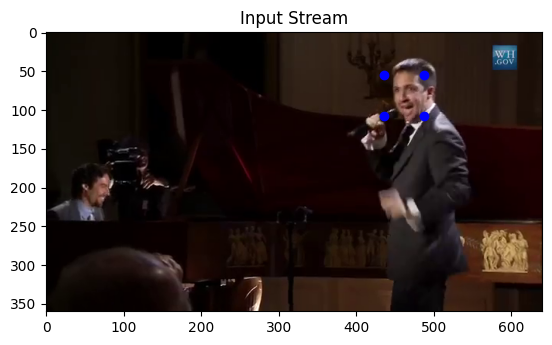

In [ ]:
# Loading video for face detection
video_capture = cv2.VideoCapture("hamilton_clip.mp4")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)